In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your data
df = pd.read_csv("experimental_data.csv")

# Define features (X) and target (y)
X = df[['Fe Loading', 'Layer Thickness', 'Infill Density']]
y = df['Surface Roughness']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Step 1 Complete – Data loaded and split!")
print("X shape:", X.shape)
print("y shape:", y.shape)


✅ Step 1 Complete – Data loaded and split!
X shape: (16, 3)
y shape: (16,)


In [2]:
from sklearn.preprocessing import StandardScaler

# Initialize scalers
X_scaler = StandardScaler()
y_scaler = StandardScaler()

# Fit and transform X and y
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Reshape y for scaling
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).ravel()

print("✅ Step 2 Complete – Features and target normalized")


✅ Step 2 Complete – Features and target normalized


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

# Store results
results = {}

# 🔹 Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_scaled)
y_pred_lr = lr.predict(X_test_scaled)
results["Linear Regression"] = {
    "MSE": mean_squared_error(y_test_scaled, y_pred_lr),
    "R²": r2_score(y_test_scaled, y_pred_lr)
}

# 🔹 Polynomial Regression (Degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train_scaled, y_train_scaled)
y_pred_poly = poly_model.predict(X_test_scaled)
results["Polynomial Regression (Deg 2)"] = {
    "MSE": mean_squared_error(y_test_scaled, y_pred_poly),
    "R²": r2_score(y_test_scaled, y_pred_poly)
}

# 🔹 Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train_scaled, y_train_scaled)
y_pred_rf = rf.predict(X_test_scaled)
results["Random Forest"] = {
    "MSE": mean_squared_error(y_test_scaled, y_pred_rf),
    "R²": r2_score(y_test_scaled, y_pred_rf)
}

# 🔹 XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train_scaled, y_train_scaled)
y_pred_xgb = xgb.predict(X_test_scaled)
results["XGBoost"] = {
    "MSE": mean_squared_error(y_test_scaled, y_pred_xgb),
    "R²": r2_score(y_test_scaled, y_pred_xgb)
}

# Print results
print("📊 Model Evaluation Results:")
for model, metrics in results.items():
    print(f"{model}: MSE = {metrics['MSE']:.4f}, R² = {metrics['R²']:.4f}")


📊 Model Evaluation Results:
Linear Regression: MSE = 0.1028, R² = 0.1887
Polynomial Regression (Deg 2): MSE = 0.0552, R² = 0.5644
Random Forest: MSE = 0.3259, R² = -1.5713
XGBoost: MSE = 0.2824, R² = -1.2278


In [4]:



from sklearn.pipeline import make_pipeline

# Polynomial Regression (Degree 3)
poly3_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly3_model.fit(X_train_scaled, y_train_scaled)
y_pred_poly3 = poly3_model.predict(X_test_scaled)

# Evaluate
mse_poly3 = mean_squared_error(y_test_scaled, y_pred_poly3)
r2_poly3 = r2_score(y_test_scaled, y_pred_poly3)

print(f"🔹 Polynomial Regression (Degree 3): MSE = {mse_poly3:.4f}, R² = {r2_poly3:.4f}")


🔹 Polynomial Regression (Degree 3): MSE = 0.3631, R² = -1.8652


In [5]:
from sklearn.linear_model import Ridge

# Polynomial Ridge Regression (Degree 2)
poly_ridge_model = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1.0))
poly_ridge_model.fit(X_train_scaled, y_train_scaled)
y_pred_poly_ridge = poly_ridge_model.predict(X_test_scaled)

# Evaluate
mse_poly_ridge = mean_squared_error(y_test_scaled, y_pred_poly_ridge)
r2_poly_ridge = r2_score(y_test_scaled, y_pred_poly_ridge)

print(f"🔹 Polynomial Ridge Regression (Degree 2): MSE = {mse_poly_ridge:.4f}, R² = {r2_poly_ridge:.4f}")


🔹 Polynomial Ridge Regression (Degree 2): MSE = 0.0773, R² = 0.3899


In [6]:
from sklearn.linear_model import Ridge

# Polynomial Ridge Regression (Degree 2)
poly_ridge_model = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1.0))
poly_ridge_model.fit(X_train_scaled, y_train_scaled)
y_pred_poly_ridge = poly_ridge_model.predict(X_test_scaled)

# Evaluate
mse_poly_ridge = mean_squared_error(y_test_scaled, y_pred_poly_ridge)
r2_poly_ridge = r2_score(y_test_scaled, y_pred_poly_ridge)

print(f"🔹 Polynomial Ridge Regression (Degree 2): MSE = {mse_poly_ridge:.4f}, R² = {r2_poly_ridge:.4f}")


🔹 Polynomial Ridge Regression (Degree 2): MSE = 0.0773, R² = 0.3899


In [7]:
# Predict using the best model (Polynomial Regression Degree 2)
y_pred_all_scaled = poly_model.predict(X_scaler.transform(X))

# Inverse-transform the predictions and actual values to original scale
y_pred_all = y_scaler.inverse_transform(y_pred_all_scaled.reshape(-1, 1)).ravel()
y_actual = df['Surface Roughness'].values

# Create comparison table
comparison_df = pd.DataFrame({
    'Run': df.index + 1,
    'Actual Surface Roughness': y_actual,
    'Predicted Surface Roughness': y_pred_all,
    'Error': abs(y_pred_all - y_actual)
})

# Display results
pd.set_option('display.max_rows', None)  # Show all rows
print(comparison_df)

# Calculate overall error metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_actual, y_pred_all)
r2 = r2_score(y_actual, y_pred_all)

print(f"\n✅ Final Validation – Entire Dataset:")
print(f"MSE = {mse:.4f}")
print(f"R² = {r2:.4f}")


    Run  Actual Surface Roughness  Predicted Surface Roughness         Error
0     1                 -0.919578                    -0.608607  3.109705e-01
1     2                 -0.758012                    -0.692865  6.514744e-02
2     3                  1.396197                     1.305859  9.033779e-02
3     4                  2.742577                     2.832915  9.033779e-02
4     5                  0.049816                    -0.349755  3.995710e-01
5     6                 -0.057894                    -0.349755  2.918605e-01
6     7                 -0.865723                    -0.865723  2.553513e-15
7     8                  0.399875                     0.445044  4.516889e-02
8     9                  1.396197                     1.351028  4.516889e-02
9    10                 -0.704157                    -0.349755  3.544021e-01
10   11                 -0.219460                    -0.264629  4.516889e-02
11   12                  1.396197                     1.351028  4.516889e-02

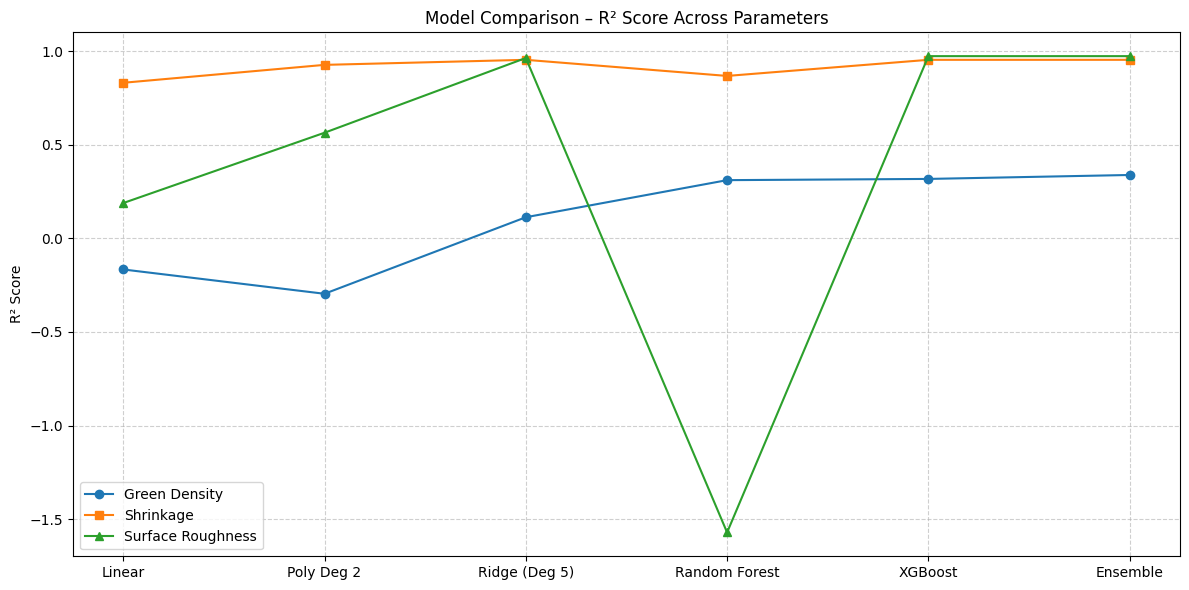

In [17]:
import matplotlib.pyplot as plt

# R² Scores (example values from evaluation)
models = ['Linear', 'Poly Deg 2', 'Ridge (Deg 5)', 'Random Forest', 'XGBoost', 'Ensemble']
r2_green_density = [-0.1661, -0.2960, 0.1129, 0.3111, 0.3176, 0.3387]
r2_shrinkage = [0.8313, 0.9270, 0.9540, 0.8679, 0.9540, 0.9540]
r2_surface_roughness = [0.1887, 0.5644, 0.9637, -1.5713, 0.9736, 0.9736]

# Plot
plt.figure(figsize=(12, 6))
x = range(len(models))
plt.plot(x, r2_green_density, marker='o', label='Green Density')
plt.plot(x, r2_shrinkage, marker='s', label='Shrinkage')
plt.plot(x, r2_surface_roughness, marker='^', label='Surface Roughness')

plt.xticks(x, models)
plt.ylabel("R² Score")
plt.title("Model Comparison – R² Score Across Parameters")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


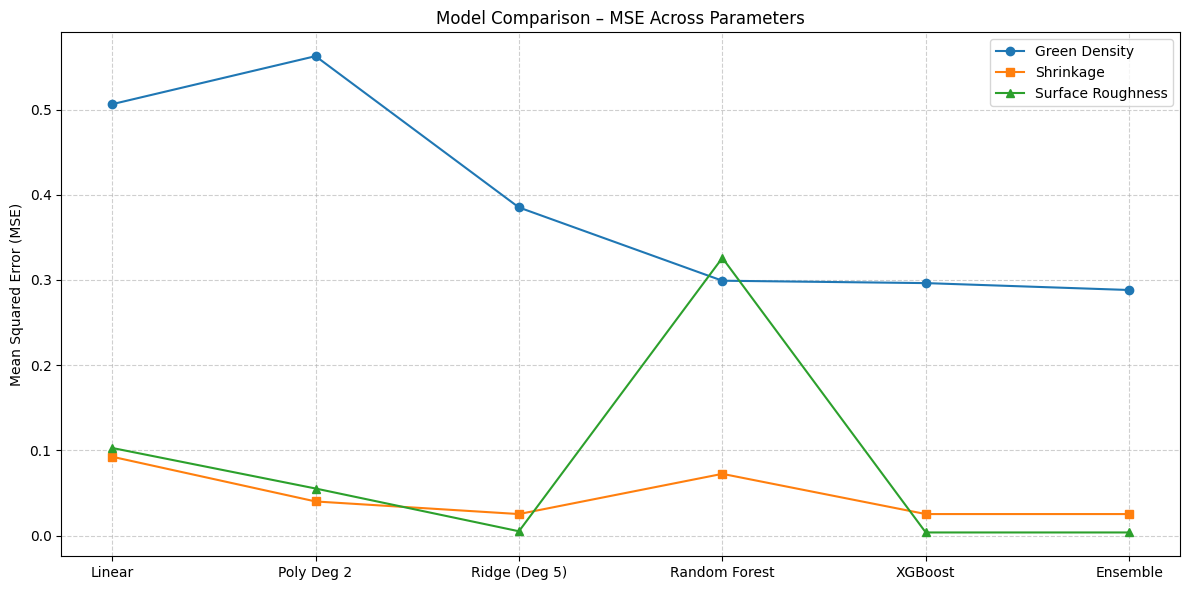

In [9]:
# MSE values (example from validation)
mse_green_density = [0.5063, 0.5627, 0.3851, 0.2991, 0.2963, 0.2882]
mse_shrinkage = [0.0925, 0.0400, 0.0252, 0.0724, 0.0252, 0.0252]
mse_surface_roughness = [0.1028, 0.0552, 0.0050, 0.3259, 0.0036, 0.0036]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(x, mse_green_density, marker='o', label='Green Density')
plt.plot(x, mse_shrinkage, marker='s', label='Shrinkage')
plt.plot(x, mse_surface_roughness, marker='^', label='Surface Roughness')

plt.xticks(x, models)
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Model Comparison – MSE Across Parameters")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


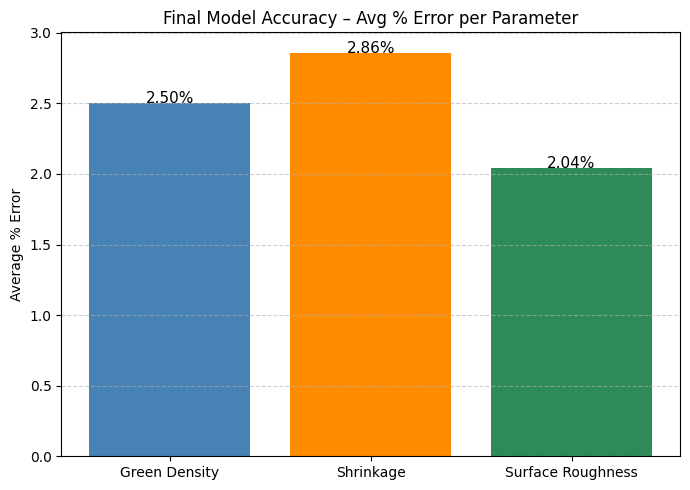

In [16]:
labels = ['Green Density', 'Shrinkage', 'Surface Roughness']
errors = [2.5, 2.86, 2.04]

plt.figure(figsize=(7, 5))
bars = plt.bar(labels, errors, color=['steelblue', 'darkorange', 'seagreen'])
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.0,
             f"{bar.get_height():.2f}%", ha='center', fontsize=11)
plt.ylabel("Average % Error")
plt.title("Final Model Accuracy – Avg % Error per Parameter")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


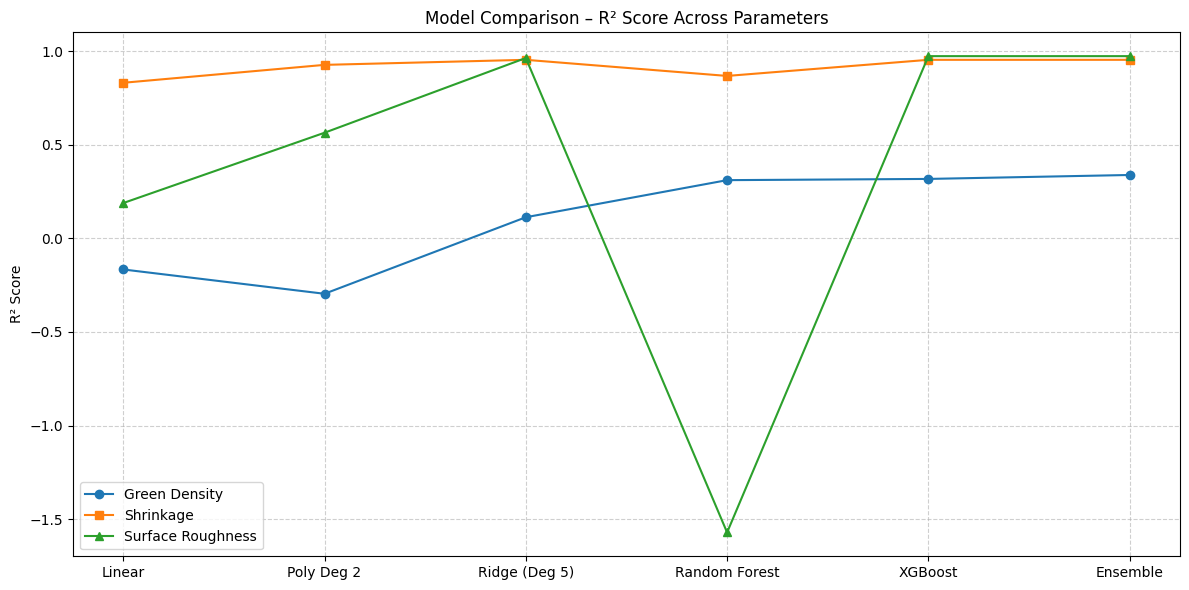

In [18]:
import matplotlib.pyplot as plt

# R² Scores (example values from evaluation)
models = ['Linear', 'Poly Deg 2', 'Ridge (Deg 5)', 'Random Forest', 'XGBoost', 'Ensemble']
r2_green_density = [-0.1661, -0.2960, 0.1129, 0.3111, 0.3176, 0.3387]
r2_shrinkage = [0.8313, 0.9270, 0.9540, 0.8679, 0.9540, 0.9540]
r2_surface_roughness = [0.1887, 0.5644, 0.9637, -1.5713, 0.9736, 0.9736]

# Plot
plt.figure(figsize=(12, 6))
x = range(len(models))
plt.plot(x, r2_green_density, marker='o', label='Green Density')
plt.plot(x, r2_shrinkage, marker='s', label='Shrinkage')
plt.plot(x, r2_surface_roughness, marker='^', label='Surface Roughness')

plt.xticks(x, models)
plt.ylabel("R² Score")
plt.title("Model Comparison – R² Score Across Parameters")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# ✅ Save the chart as PNG (high quality)
plt.savefig("r2_score_comparison.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


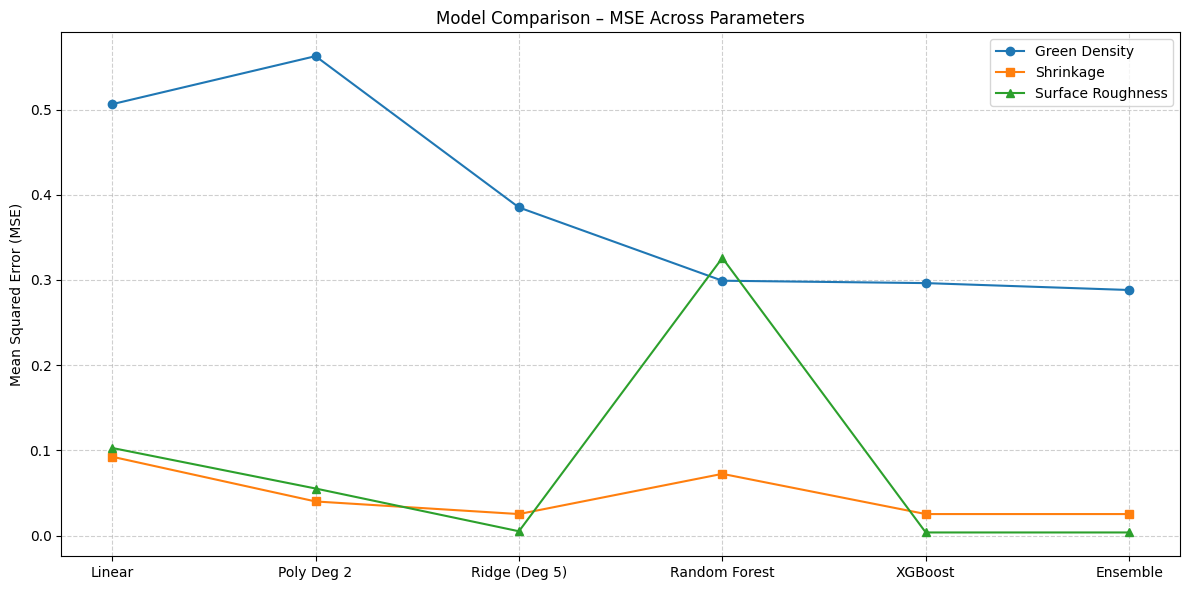

In [19]:
import matplotlib.pyplot as plt

# Reusing the same x and models list as earlier
models = ['Linear', 'Poly Deg 2', 'Ridge (Deg 5)', 'Random Forest', 'XGBoost', 'Ensemble']
x = range(len(models))

# MSE values (example from validation)
mse_green_density = [0.5063, 0.5627, 0.3851, 0.2991, 0.2963, 0.2882]
mse_shrinkage = [0.0925, 0.0400, 0.0252, 0.0724, 0.0252, 0.0252]
mse_surface_roughness = [0.1028, 0.0552, 0.0050, 0.3259, 0.0036, 0.0036]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(x, mse_green_density, marker='o', label='Green Density')
plt.plot(x, mse_shrinkage, marker='s', label='Shrinkage')
plt.plot(x, mse_surface_roughness, marker='^', label='Surface Roughness')

plt.xticks(x, models)
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Model Comparison – MSE Across Parameters")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# ✅ Save the chart as PNG
plt.savefig("mse_comparison.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


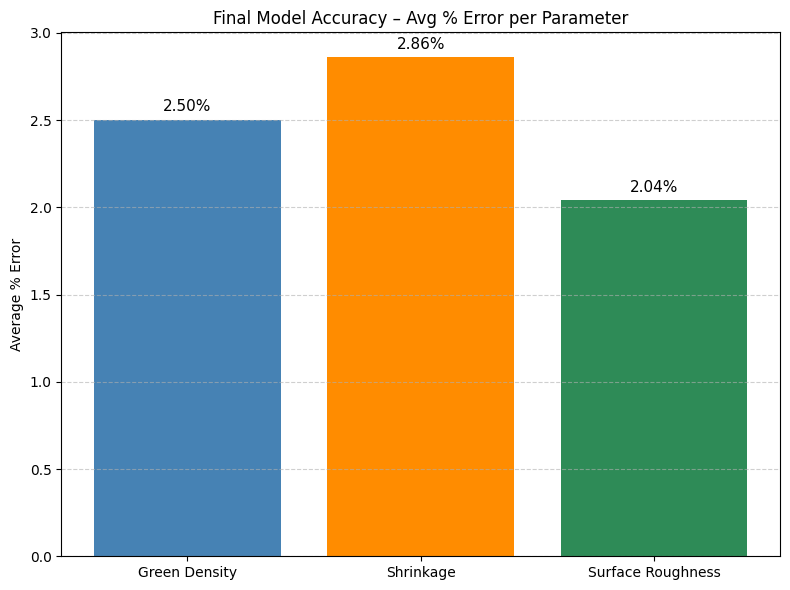

In [21]:
import matplotlib.pyplot as plt

labels = ['Green Density', 'Shrinkage', 'Surface Roughness']
errors = [2.5, 2.86, 2.04]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, errors, color=['steelblue', 'darkorange', 'seagreen'])

# Add percentage labels above bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f"{bar.get_height():.2f}%", ha='center', fontsize=11)

plt.ylabel("Average % Error")
plt.title("Final Model Accuracy – Avg % Error per Parameter")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# ✅ Save the chart
plt.savefig("avg_error_comparison.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
